### This group project is about predicting the outbreak of west nile virus in Chicago, IL. This virus is transmitted to humans by mosquitos. Therefore, traps has been set to collect moquitos. The traps then were tested to see whether the collected mosquitos have the virus or not. The information gathered from the mosquito traps such as the type of the mosquito along with other data such as location, date, weather,  and whether there had been an spray of pesticide  to kill the mosquitos in that location are used to predict the presence of a west nile virus carrying mosquito in a trap.  
### The train set contains inforamtion about years 2007, 2009, 2011, and 2013 and is used to predict the presence of wnv in years of 2008, 2010, 2012, and 2014.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [31]:
#importing data, spray data for the test set (2008,2010,2012,2014) is not provided. Therefore, spray info is not used for the analysis
train = pd.read_csv('./assets/train.csv')
test =pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray =pd.read_csv('./assets/spray.csv')
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

In [32]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [33]:
print train.head()
train.shape

         Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   

(10506, 12)

In [34]:
train.Trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

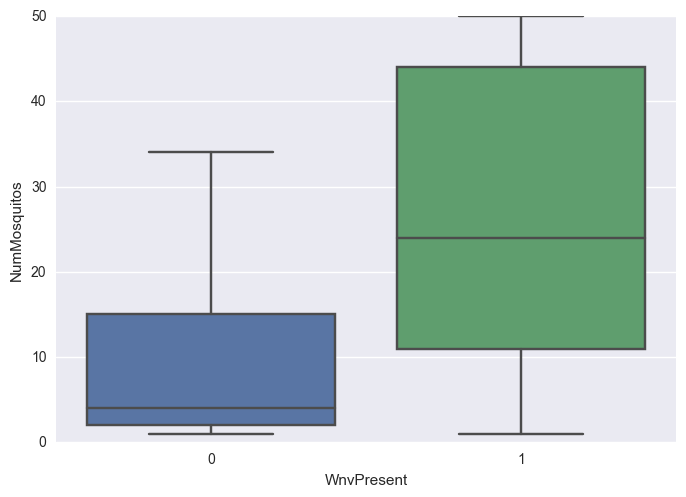

In [35]:
# Number of mosquitos in traps with or without wnv 
ax = sns.boxplot( y="NumMosquitos",x="WnvPresent", data=train,showfliers=False)
plt.show()

In [36]:
# Given the number of mosquitos in a trap, what is the probability of finding the virus in that trap! 
number_of_mosquito_probability = train.groupby(pd.cut(train['NumMosquitos'], range(0, 50,5)), as_index = False).WnvPresent.mean()
number_of_mosquito_probability['NumMosquitos']=[5,10,15,20,25,30,35,40,45]

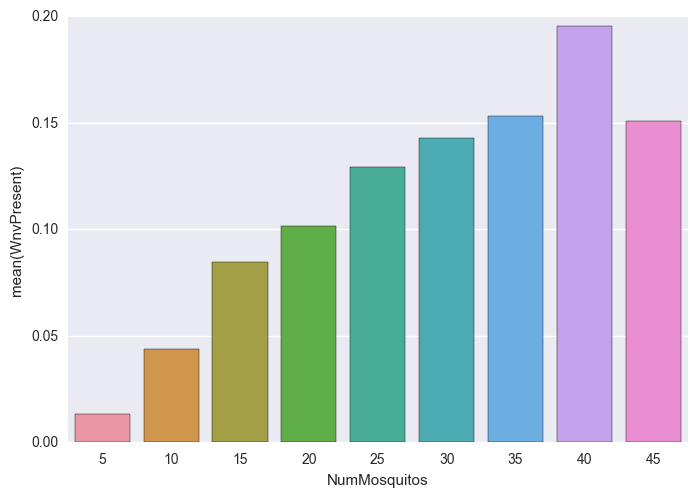

In [37]:
sns.barplot( x="NumMosquitos",y="WnvPresent", data=number_of_mosquito_probability)
plt.show()

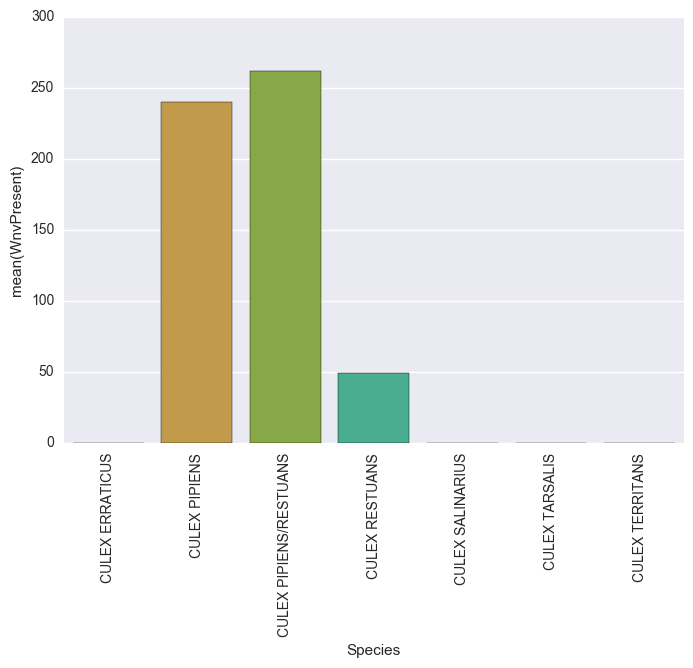

In [38]:
# effect of mosquito type on the presence of wnv
mosquito_type = train.groupby(train['Species'], as_index = False).WnvPresent.sum()
ax = sns.barplot( x="Species",y="WnvPresent", data=mosquito_type)
ax.set_xticklabels(mosquito_type.Species,rotation=90)
plt.show()

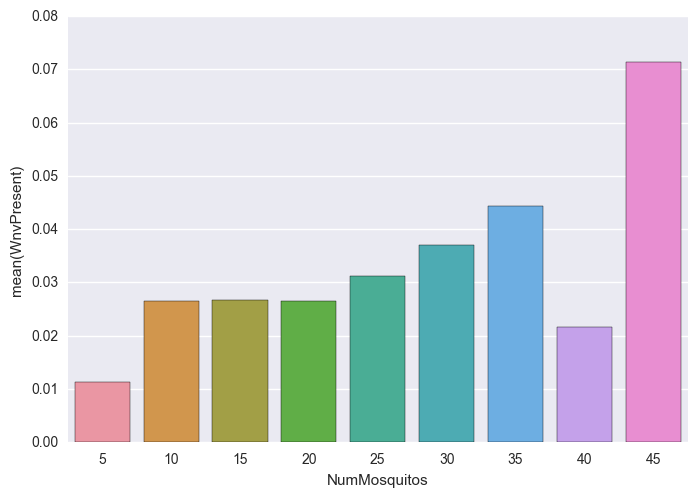

In [39]:
spec1 = train[train['Species'] =='CULEX RESTUANS']
number_of_mosquito_probability = spec1.groupby(pd.cut(spec1['NumMosquitos'], range(0, 50,5)), as_index = False).WnvPresent.mean()
number_of_mosquito_probability['NumMosquitos']=[5,10,15,20,25,30,35,40,45]
sns.barplot( x="NumMosquitos",y="WnvPresent", data=number_of_mosquito_probability)
plt.show()

In [40]:
train.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

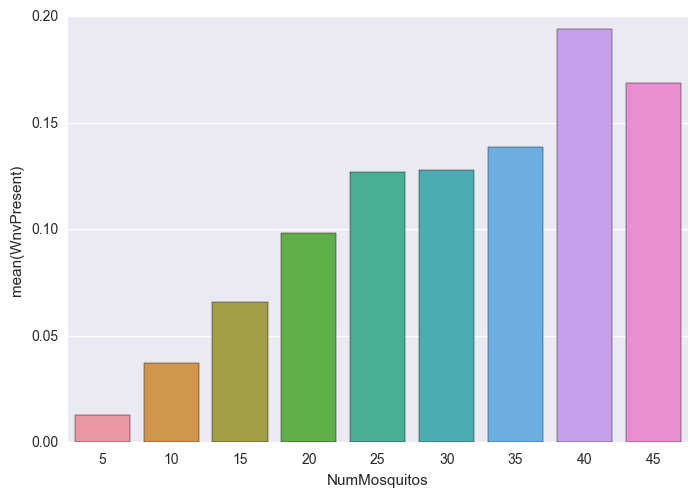

In [41]:
spec1 = train[train['Species'] =='CULEX PIPIENS/RESTUANS']
number_of_mosquito_probability = spec1.groupby(pd.cut(spec1['NumMosquitos'], range(0, 50,5)), as_index = False).WnvPresent.mean()
number_of_mosquito_probability['NumMosquitos']=[5,10,15,20,25,30,35,40,45]
sns.barplot( x="NumMosquitos",y="WnvPresent", data=number_of_mosquito_probability)
plt.show()

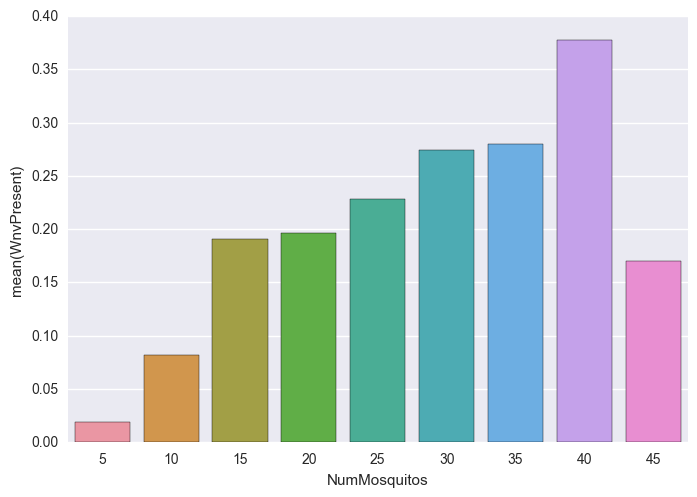

In [42]:
spec1 = train[train['Species'] =='CULEX PIPIENS']
number_of_mosquito_probability = spec1.groupby(pd.cut(spec1['NumMosquitos'], range(0, 50,5)), as_index = False).WnvPresent.mean()
number_of_mosquito_probability['NumMosquitos']=[5,10,15,20,25,30,35,40,45]
sns.barplot( x="NumMosquitos",y="WnvPresent", data=number_of_mosquito_probability)
plt.show()

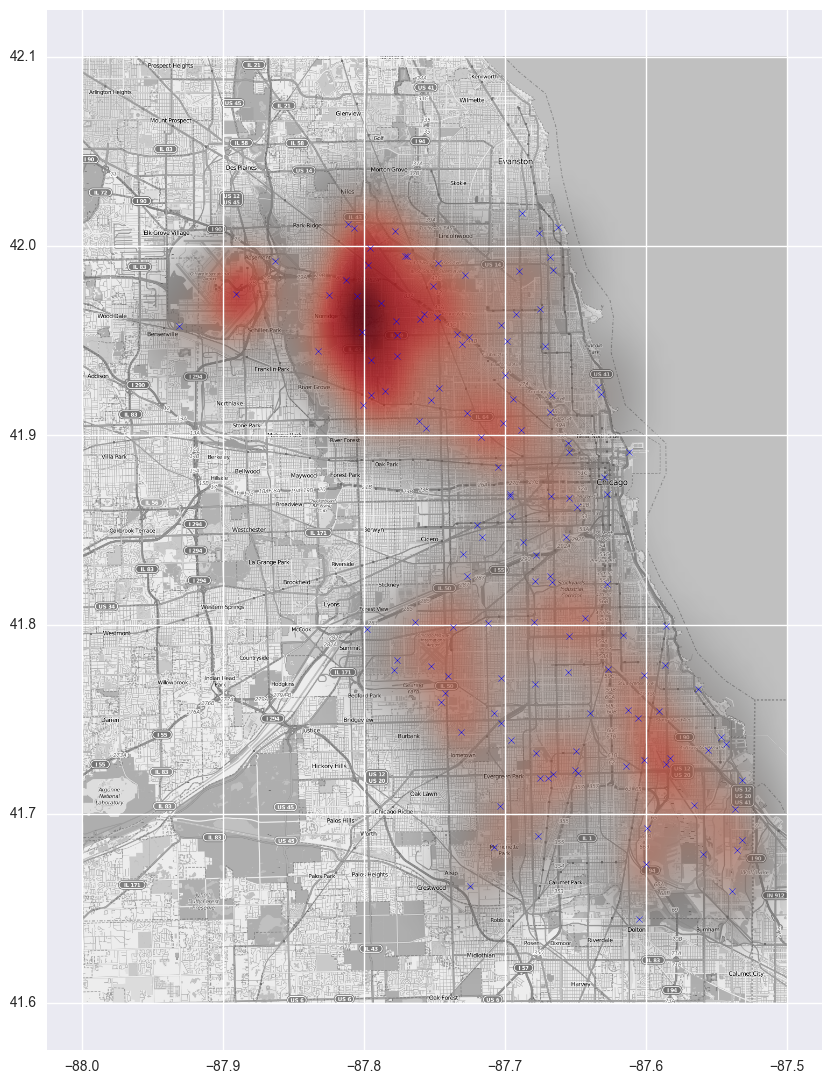

In [43]:
#This is from kaggle website as an example of using maps (https://www.kaggle.com/dchudz/predict-west-nile-virus/where-are-the-measurement-points)
#%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.show()
#plt.savefig('heatmap.png')

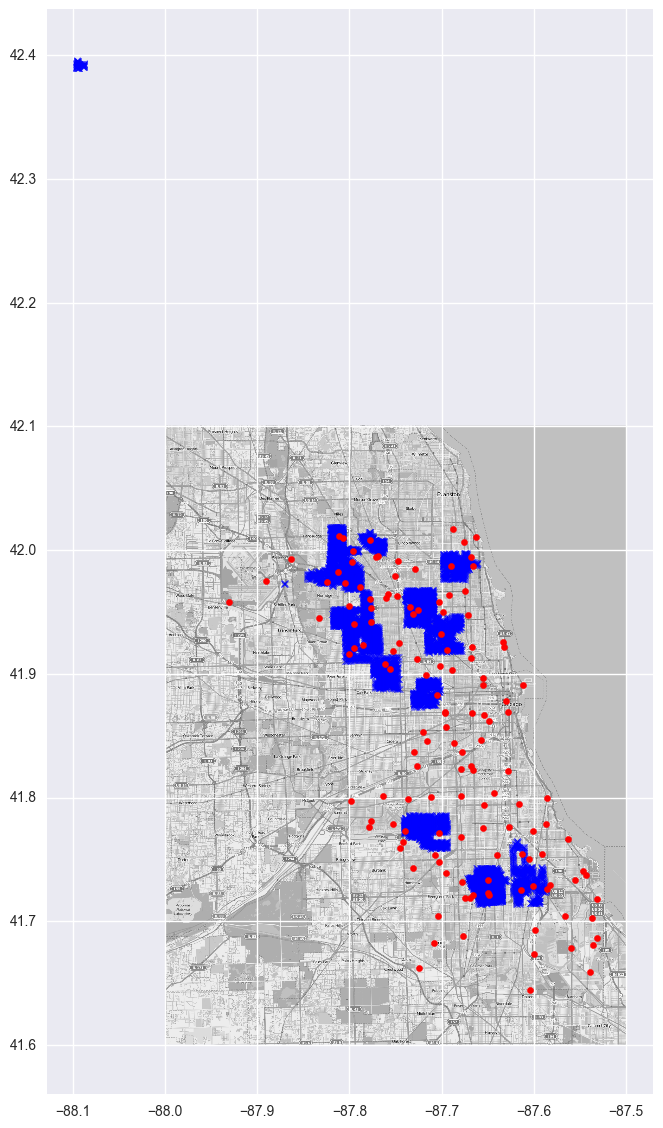

In [44]:
#This is from kaggle website as an example of using maps (https://www.kaggle.com/dchudz/predict-west-nile-virus/where-are-the-measurement-points)
#%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = spray[['Date','Longitude', 'Latitude']]
traps1 = train[['Longitude', 'Latitude']]
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#sigthings = traps
#sigthings = sigthings.groupby([ 'Longitude', 'Latitude']).max()['Date'].reset_index()
#X = sigthings[['Longitude', 'Latitude']].values
#kd = KernelDensity(bandwidth=0.02)
#kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
#zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
#plt.imshow(zv, 
 #          origin='lower', 
    #         cmap=alpha_cm, 
    #       extent=lon_lat_box, 
     #      aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
loc =traps1[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(loc[:,0], loc[:,1], marker='o', color = 'red')
plt.show()
#plt.savefig('heatmap.png')

In [46]:
trap = train[['Longitude', 'Latitude']].drop_duplicates()
trap['sprayed'] = np.where(((np.round(trap.Longitude,3).isin(longi)) & (np.round(trap.Latitude,3).isin(lati))), 1,0)
data =trap[trap['sprayed'] == 1]

In [47]:
workingdata= spray[['Date','Longitude', 'Latitude']]




longi= np.round(workingdata.Longitude, 5)
lati =np.round(workingdata.Latitude, 5)
p=[]
g =[]

for i in range(len(longi)):

    p.append(float("{0:.5f}".format(longi[i])))# formatting to show only 4 decimals
    g.append(float("{0:.5f}".format(lati[i])))
longi =p
lati= g


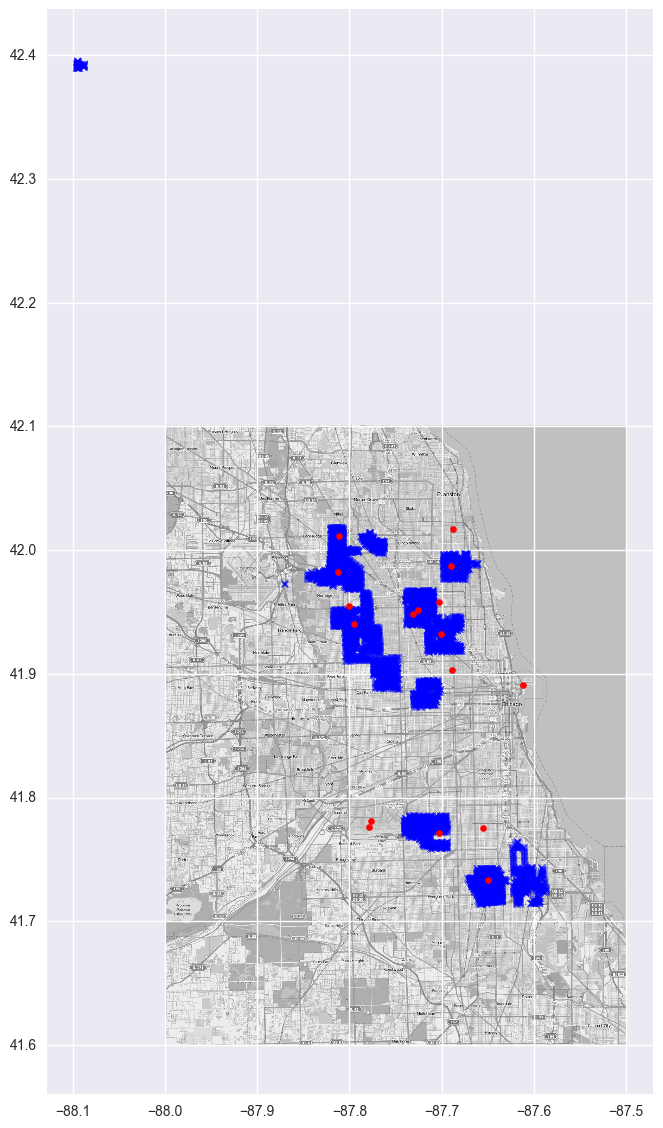

In [49]:

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = workingdata[['Longitude', 'Latitude']]
traps1 = data[['Longitude', 'Latitude']]
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#sigthings = traps
#sigthings = sigthings.groupby([ 'Longitude', 'Latitude']).max()['Date'].reset_index()
#X = sigthings[['Longitude', 'Latitude']].values
#kd = KernelDensity(bandwidth=0.02)
#kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
#zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
#plt.imshow(zv, 
 #          origin='lower', 
    #         cmap=alpha_cm, 
    #       extent=lon_lat_box, 
     #      aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
loc =traps1[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(loc[:,0], loc[:,1], marker='o', color = 'red')
plt.show()
#plt.savefig('heatmap.png')

In [50]:
trap_longi= np.round(trap.Longitude, 5)
trap_lati =np.round(trap.Latitude, 5)
trap_longi =list(trap_longi)# from series to lists
trap_lati =list(trap_lati)
p=[]
g =[]
for i in range(len(trap_lati)):

    p.append(float("{0:.5f}".format(trap_longi[i])))
    g.append(float("{0:.5f}".format(trap_lati[i])))
trap_longi =p
trap_lati= g

In [51]:
f=[]
for i in range(len(longi)):
    addi = 0.0
    for j in range(len(trap_longi)):
        if (trap_longi[j] == longi[i]) and (trap_lati[j] == lati[i]):
            addi =addi +1
        else:
            addi =addi +0
    f.append(addi)
        

In [52]:
len(longi)

14835

In [53]:
sum(f)
    
    

0.0

In [54]:
#EDA
print(train.shape)
print(train.head())
print(train.describe(include ='all'))
print(train.isnull().sum())
print(train.dtypes)

(10506, 12)
         Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991        

In [55]:
#EDA
#M = missing data
#T = trace precipitation
print(weather.shape)
print(weather.head())
print(weather.describe(include ='all'))
print(weather.isnull().sum())
print(weather.dtypes)

(2944, 22)
   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

     ...    CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0    ...                0      M      0.0        0.00       29.10    29.82   
1    ...                M      M        M        0.00       29.18    29.82   
2    ...         BR     0      M      0.0        0.00       29.38    30.09   
3    ...      BR HZ     M      M        M        0.00       29.44    30.08   
4    ...                0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7  

In [56]:
weather.columns

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [57]:
#only working with the data from Station No. 1 and using Tavg, total precipitation, and wind speed as variables
weather = weather[weather['Station']== 1]
weather = weather[['Date','Tavg','PrecipTotal','ResultSpeed']]


In [58]:
# Adding the weather data to the train and test data
train_add =train.join(weather.set_index('Date'), on='Date')
test_add = test.join(weather.set_index('Date'), on='Date')

In [59]:
# reformatting  Tavg to float
train_add['Tavg']=train_add.Tavg.astype(float)
# assigning 0 instead of T and reformatting PrecipTotal to float
train_add['PrecipTotal']= np.where(train_add['PrecipTotal']=='  T', '0.0', train_add['PrecipTotal'])
train_add['PrecipTotal']= train_add.PrecipTotal.astype(float)

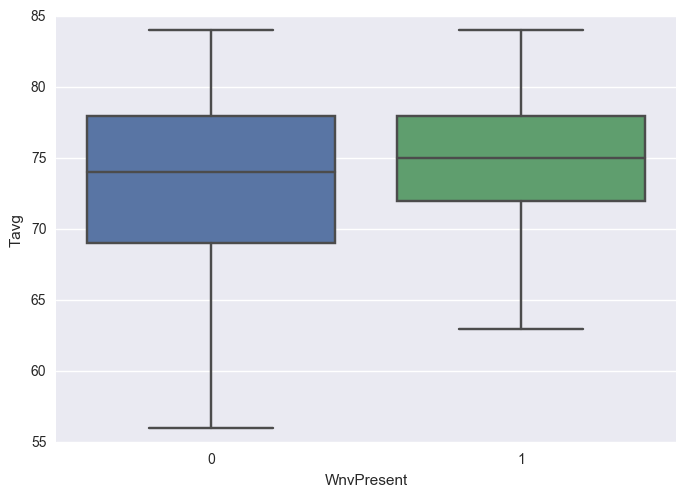

In [60]:
# Tavg in traps with or without wnv 
ax = sns.boxplot( y="Tavg",x="WnvPresent", data=train_add,showfliers=False)
plt.show()

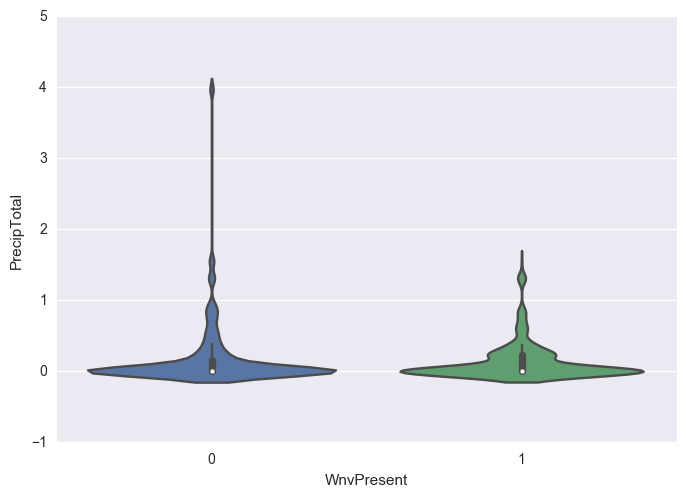

In [62]:
ax = sns.violinplot( y="PrecipTotal",x="WnvPresent", data=train_add)
plt.show()

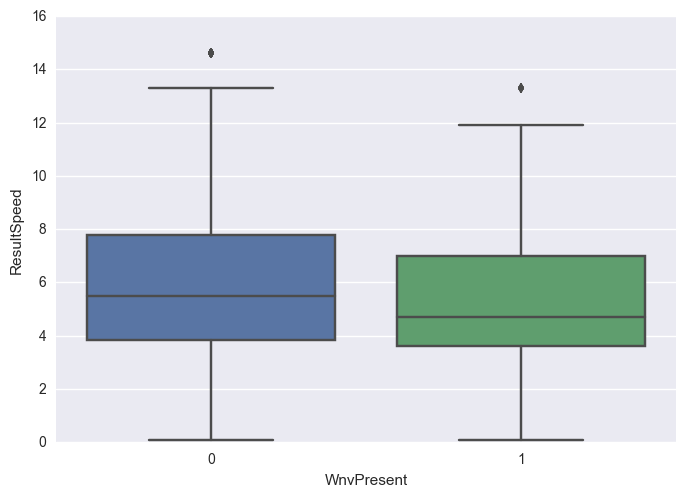

In [63]:
ax = sns.boxplot( y="ResultSpeed",x="WnvPresent", data=train_add)
plt.show()

#### Seems like wind speed, precipitation, and average temperature do not have a huge effect on wnv presence. However, location, number of mosquitos in the trap and the type of mosquitos have bigger effect.

In [65]:
from datetime import datetime
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
weather['Date'] = pd.to_datetime(weather['Date'], format='%Y-%m-%d')

In [80]:
train['week'] = train['Date'].dt.weekofyear
train['year'] = train['Date'].dt.year
test['week'] = test['Date'].dt.weekofyear
test['year'] = test['Date'].dt.year

In [67]:
print test.columns
train.columns

Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'week', u'year'],
      dtype='object')


Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent', u'week', u'year'],
      dtype='object')

In [68]:
weeks = train.groupby(['year','week'], as_index=False).WnvPresent.sum()

In [69]:
test.head()


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,week,year
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,24,2008
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,24,2008
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,24,2008
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,24,2008
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,24,2008


In [70]:
weeks.dtypes

year          int64
week          int64
WnvPresent    int64
dtype: object

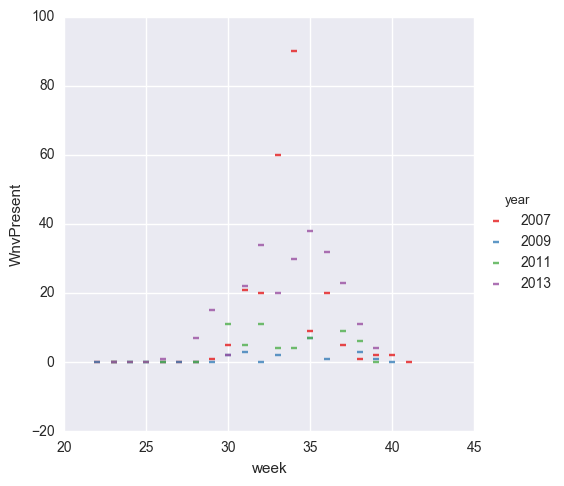

In [71]:
import seaborn as sns
#weeks['Datetime'] = df.index
ax=sns.lmplot(data = weeks, x='week',  y='WnvPresent',hue='year', fit_reg=False, palette="Set1",markers= '_' )
#plt.plot( weeks['week'],  weeks['WnvPresent'] , color = weeks['year'])
plt.show()


In [72]:
weeks['index'] =weeks.index
weeks.head()

,year,week,WnvPresent,index
0,2007,22,0,0
1,2007,23,0,1
2,2007,26,0,2
3,2007,27,0,3
4,2007,28,0,4


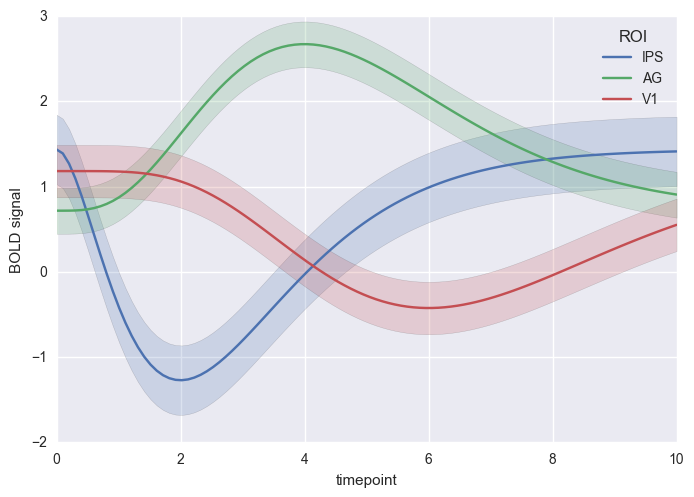

In [74]:
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal",unit="subject", condition="ROI",data=gammas)
plt.show()

## Models

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score, StratifiedKFold ,train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [78]:
# model evaluation function
def evaluate_model(model):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    probabilities = model.predict_proba(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

    confusion = pd.DataFrame(conmat, index=['1', '0'],
                         columns=['predicted_1','predicted_0'])

    cr = classification_report(y_test, y_pred)
    
    print 'confusion matrix:',confusion
    print 'classification_report:',cr
    print 'Accuracy of the model on test:',a
    return probabilities

## Random Forest

In [79]:
X=train['week','year',]

KeyError: ('week', 'year')

In [ ]:
##Grid search over Random Forest parameters
params = {'max_features ': [0.1,.5,1.0],'max_depth':[0.1,0.5,1.0],'n_estimators':[3, 5, 10, 50]}

gsrf = GridSearchCV(RandomForestClassifier(random_state = 33),
                     params, n_jobs=-1,
                     cv=StratifiedKFold(len(y), n_folds=3, shuffle=True))
gsrf.fit(X, y)
print 'best parameters for the model:',gsrf.best_params_
print 'best score on train:',gsrf.best_score_
probability = evaluate_model(gsrf.best_estimator_)
#print 'model score on test:',score

# KNN 

In [ ]:
# Grid search over KNN parameters
params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=StratifiedKFold(len(y), n_folds=3, shuffle=True))
gsknn.fit(X, y)
print 'best parameters for the model:',gsknn.best_params_
print 'best score on train:',gsknn.best_score_
probability = evaluate_model(gsknn.best_estimator_)
#print 'model score on test:',score

## Logestic Regression

In [ ]:
# Grid search over logestic regression parameters
params = {'penalty': ['l2','l1'], 'C':[0.1,1.0,10]}

gslr = GridSearchCV(LogisticRegression(solver = 'sag',random_state = 33),
                     params, n_jobs=-1,
                     cv=StratifiedKFold(len(y), n_folds=3, shuffle=True))
gslr.fit(X, y)
print 'best parameters for the model:',gslr.best_params_
print 'best score on train:',gslr.best_score_
probability = evaluate_model(gslr.best_estimator_)
#print 'model score on test:',score

## SVM

In [ ]:
scaled_X =StandardScaler(X)
scaled_X_test =StandardScaler(X_test)
# Grid search over support vector machine parameters
params = { 'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}

gssvc = GridSearchCV(SVC(random_state = 33),
                     params, n_jobs=-1,
                     cv=StratifiedKFold(len(y), n_folds=3, shuffle=True))
gssvc.fit(scaled_X, y)
print 'best parameters for the model:',gssvc.best_params_
print 'best score on train:',gssvc.best_score_
probability = evaluate_model(gssvc.best_estimator_)#!!!!!!! check to used scaled vectors!
#print 'model score on test:',score

## Gradiant Boosting


In [ ]:
##Grid search over Random Forest parameters
params = {'max_features ': [0.1,.5,1.0],'max_depth':[0.1,0.5,1.0],'n_estimators':[3, 5, 10, 50]}

gsgb = GridSearchCV(GradientBoostingClassifier(random_state = 33),
                     params, n_jobs=-1,
                     cv=StratifiedKFold(len(y), n_folds=3, shuffle=True))
gsgb.fit(X, y)

print 'best parameters for the model:',gsgb.best_params_
print 'best score on train:',gsgb.best_score_
probability = evaluate_model(gsgb.best_estimator_)
#print 'model score on test:',score

In [ ]:
### cross val score???

In [ ]:
#AUC 
y_score=[]
for i in range(0,len(probability)):
    y_score.append(probability[i][1])


FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 
plt.figure(figsize=[5,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic for salary ', fontsize=12)
plt.legend(loc="lower right")
plt.savefig('ROC_AUC.png')
plt.show()